# 설정, importing

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

import matplotlib as mpl 
mpl.rcParams['font.family'] = "Apple SD Gothic Neo"
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

df = pd.read_excel('data/data.xlsx', sheet_name = ['main1','main2','main3','sub1','sub3','sub4',])

main1, main2, main3,sub1,sub3, sub4 = df.values()

main4 = pd.read_csv("data/서울시 주민등록연앙인구(연령별동별) 통계.csv")

sub2 = pd.read_csv("data/서울시 주민등록인구 (동별) 통계.csv")

# main1 학원

## 전처리

In [5]:
del_idx=main1[main1.도로명주소.isna() != False].index
del_idx=[i for i in del_idx]
main1.drop(del_idx,axis=0,inplace=True)
for i in range(len(main1)):
    try:
        if pd.isnull(main1['행정구역명'][i])==True:
            main1['행정구역명'][i]=main1['도로명주소'][i].split()[1]
    except KeyError:
        pass
main1.reset_index(drop=True,inplace=True)

del_idx_t=[]
for i in range(len(main1)):
    try:
        main1['등록일자'][i]=pd.to_datetime(str(main1['등록일자'][i])[0:4]+'-'+str(main1['등록일자'][i])[4:6]+'-'+str(main1['등록일자'][i])[6:8])
        main1['개설일자'][i]=pd.to_datetime(str(main1['개설일자'][i])[0:4]+'-'+str(main1['개설일자'][i])[4:6]+'-'+str(main1['개설일자'][i])[6:8])
    except ValueError:
        del_idx_t.append(i)
    except KeyError:
        pass
main1.drop(del_idx_t,axis=0,inplace=True)
main1.reset_index(drop=True,inplace=True)

for i in range(len(main1)):
    try:
        main1['휴원시작일자'][i]=pd.to_datetime(str(main1['휴원시작일자'][i])[0:4]+'-'+str(main1['휴원시작일자'][i])[4:6]+'-'+str(main1['휴원시작일자'][i])[6:8])
        main1['휴원종료일자'][i]=pd.to_datetime(str(main1['휴원종료일자'][i])[0:4]+'-'+str(main1['휴원종료일자'][i])[4:6]+'-'+str(main1['휴원종료일자'][i])[6:8])
    except ValueError:
        pass
    
del_idx_cat=main1[main1.교습계열명.isna() != False].index
del_idx_cat=[i for i in del_idx_cat]
main1.drop(del_idx_cat,axis=0,inplace=True)
main1.reset_index(drop=True,inplace=True)

b=main1['일시수용능력인원합계'].isna()==True
main1[b]

,행정구역명,학원/교습소,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정명,정원합계,일시수용능력인원합계,인당수강료내용,기숙사학원여부,등록일자,휴원시작일자,휴원종료일자,개설일자
18880,강남구,학원,바로에이아이아카데미(BARO AI ACADEMY)학원,서울특별시 강남구 광평로56길 14,/ 5층 전체 (수서동),직업기술,컴퓨터,컴퓨터(정보처리/통신기기/인터넷/소프트웨어),0,NaN,NaN,N,2019-12-02 00:00:00,NaN,NaN,2019-12-02 00:00:00
19232,광진구,교습소,퍼스트잉글리시영어교습소,서울특별시 광진구 뚝섬로38길 8-9,/ 호101호 (자양동),국제화,외국어,실용외국어(유아/초?중?고),0,NaN,NaN,N,2020-01-22 00:00:00,NaN,NaN,2020-01-22 00:00:00
19680,강서구,교습소,아르매쓰(Ar Math)수학교습소,서울특별시 강서구 우장산로2길 45,/ 2층 일부 (내발산동/ 연무빌딩),입시.검정 및 보습,보통교과,보습,0,NaN,NaN,N,2020-04-14 00:00:00,NaN,NaN,2020-04-14 00:00:00
19798,광진구,교습소,음악공간피아노교습소,서울특별시 광진구 아차산로 320,/ 1층 일부 (자양동/ 영서빌딩),예능(대),예능(중),음악,0,NaN,NaN,N,2020-05-13 00:00:00,NaN,NaN,2020-05-13 00:00:00
20068,강동구,교습소,아트앤하트삼익그린미술교습소,서울특별시 강동구 고덕로46길 71,/ 401호 일부 (명일동/ 삼익그린맨션),예능(대),예능(중),미술,0,NaN,NaN,N,2020-07-15 00:00:00,NaN,NaN,2020-07-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,동작구,학원,나이스앤이지학원,서울특별시 동작구 장승배기로 7,/ 4층 (상도동),입시.검정 및 보습,보통교과,보습,0,NaN,NaN,N,2022-03-18 00:00:00,NaN,NaN,2022-03-18 00:00:00
23567,동작구,교습소,사당베스트수학교습소,서울특별시 동작구 동작대로17길 40,/ 1층일부 (사당동),입시.검정 및 보습,보통교과,보습,0,NaN,NaN,N,2022-03-18 00:00:00,NaN,NaN,2022-03-18 00:00:00
23571,성동구,교습소,제이앤영어교습소,서울특별시 성동구 고산자로6가길 20,/ 101호 (행당동),입시.검정 및 보습,보통교과,보습,0,NaN,NaN,N,2022-03-17 00:00:00,NaN,NaN,2022-03-17 00:00:00
23577,영등포구,교습소,놀작키즈아르떼미술교습소,서울특별시 영등포구 선유로3길 10,/ 127호 (문래동5가/ 하우스디 비즈),예능(대),예능(중),미술,0,NaN,NaN,N,2022-03-18 00:00:00,NaN,NaN,2022-03-18 00:00:00


In [6]:
main1['기숙사학원여부'].fillna('N',inplace=True)
main1['인당수강료내용'].fillna('불명',inplace=True)
main1['일시수용능력인원합계'].fillna(main1['정원합계'],inplace=True)
main1.reset_index(drop=True,inplace=True)

In [7]:
a=main1['휴원시작일자'].isna()!=True
main1[a]

,행정구역명,학원/교습소,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정명,정원합계,일시수용능력인원합계,인당수강료내용,기숙사학원여부,등록일자,휴원시작일자,휴원종료일자,개설일자
27,동대문구,학원,미시간캠퍼스어학원,서울특별시 동대문구 휘경로 39,4층일부 (이문동),국제화,외국어,실용외국어(유아/초?중?고),60,178.0,불명,N,1992-07-29 00:00:00,2011-06-27 00:00:00,2011-08-28 00:00:00,1992-07-29 00:00:00
168,마포구,학원,마포뮤즈음악학원,서울특별시 마포구 만리재옛길 62,/ 3층 (공덕동),예능(대),예능(중),음악,222,59.0,불명,N,1998-01-20 00:00:00,2020-11-23 00:00:00,2021-01-15 00:00:00,1998-01-20 00:00:00
284,금천구,학원,킹스아카데미(King`s Academy)학원,서울특별시 금천구 시흥대로146길 18,2/3층 독산동,입시.검정 및 보습,보통교과,보습,165,108.0,불명,N,1989-12-15 00:00:00,2010-10-21 00:00:00,2010-10-28 00:00:00,1989-12-15 00:00:00
326,영등포구,학원,민트테이블독서실,서울특별시 영등포구 여의대방로43라길 6,/ 501호/ 502호 일부 (신길동/신길프라자),독서실,독서실,독서실(유아/초?중?고),945,105.0,불명,N,1997-04-17 00:00:00,2017-11-18 00:00:00,2018-01-05 00:00:00,1997-04-17 00:00:00
476,노원구,학원,학림2관학원,서울특별시 노원구 중계로 217,중계중흥빌딩 601호,입시.검정 및 보습,보통교과,보습?논술,2725,199.0,불명,N,1999-07-27 00:00:00,2014-12-24 00:00:00,2015-05-15 00:00:00,2015-01-29 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24969,영등포구,교습소,탑수학교습소,서울특별시 영등포구 신길로42길 9,/ 1층 일부 (신길동),입시.검정 및 보습,보통교과,보습,10,5.0,불명,N,2005-03-29 00:00:00,2011-02-01 00:00:00,2011-02-14 00:00:00,2005-03-29 00:00:00
24994,강남구,교습소,옥케이영어교습소,서울특별시 강남구 도곡로77길 14,양지빌딩 203호 (대치동),입시.검정 및 보습,보통교과,보습,16,8.0,중등:250000/ 고등:200000,N,2005-04-02 00:00:00,2012-01-01 00:00:00,2012-02-28 00:00:00,2005-04-02 00:00:00
25034,강북구,교습소,예찬피아노음악교습소,서울특별시 강북구 도봉로38길 23-7,1층 (미아동),예능(대),예능(중),음악,48,6.0,초급바이엘A:100000/ 중급체르니100:110000/ 중급체르니30:110000...,N,2005-04-11 00:00:00,2020-02-24 00:00:00,2020-04-19 00:00:00,2005-04-11 00:00:00
25063,중구,교습소,정연음악교습소,서울특별시 중구 다산로36가길 16,3층 (신당동),예능(대),예능(중),음악,16,4.0,피아노 일반:151200/ 피아노 초급:163300/ 피아노 중급:176400/ 피...,N,2005-04-16 00:00:00,2013-08-27 00:00:00,2013-09-09 00:00:00,2005-04-16 00:00:00


## 분석 및 시각화

In [8]:
a = {'이?미용':'미용', '보습?논술' : '보습/논술', '실용외국어(유아/초?중?고)':'실용외국어(유아/초/중/고)', '독서실(유아/초?중?고)' : '독서실', }

In [9]:
main1['교습과정명'] = main1['교습과정명'].replace(a)

In [10]:
col = ['인당수강료내용','기숙사학원여부','등록일자', '휴원시작일자', '휴원종료일자', '개설일자']

In [11]:
main1 = main1.drop(columns = col)

In [12]:
main1.drop_duplicates()

,행정구역명,학원/교습소,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정명,정원합계,일시수용능력인원합계
0,동대문구,학원,도우리이용기술학원,서울특별시 동대문구 왕산로33길 32,/ 2층 (제기동),직업기술,산업응용기술,미용,40,20.0
1,동대문구,학원,국제전자과학학원,서울특별시 동대문구 고산자로36길 3,/ 3층 일부 (제기동/ 경동시장),직업기술,산업기반기술,전자,30,91.0
2,동대문구,학원,조이앤플레이음악학원,서울특별시 동대문구 이문로 38,/ 3층 301호 (휘경동/ 민족통일빌딩),예능(대),예능(중),음악,98,45.0
3,동대문구,학원,한독자동차정비학원,서울특별시 동대문구 왕산로 31,/ 2층/3층 (신설동),직업기술,산업기반기술,자동차,210,177.0
4,중랑구,학원,예맥보습학원,서울특별시 중랑구 동일로151길 30,2층3층 (묵동),입시.검정 및 보습,보통교과,보습,18,152.0
...,...,...,...,...,...,...,...,...,...,...
25141,강서구,학원,삼삼공학원,서울특별시 강서구 곰달래로 161,2층 (화곡동),입시.검정 및 보습,보통교과,보습,80,62.0
25142,강서구,학원,맑은소리숲음악학원,서울특별시 강서구 화곡로59길 37,2층(화곡동),예능(대),예능(중),음악,24,79.0
25143,성북구,교습소,카라얀음악교습소,서울특별시 성북구 정릉로 292,현대홈타운아파트 상가 203호 (정릉동),예능(대),예능(중),음악,24,4.0
25144,성북구,교습소,참글터논술교습소,서울특별시 성북구 북악산로 851,/ 3층 307호 (정릉동),입시.검정 및 보습,보통교과,보습/논술,30,6.0


In [13]:
main1['교습과정명'].unique()

array(['미용', '전자', '음악', '자동차', '보습', '보습/논술', '미술', '건축', '컴퓨터(소)',
       '보통교과', '실용외국어(유아/초/중/고)', '식음료품(바리스타/소믈리에)', '독서실',
       '컴퓨터(정보처리/통신기기/인터넷/소프트웨어)', '독서실(일반인)', '토목', '회계', '어학(성인)',
       '간호조무사', '무용', '무용(전통무용/현대무용)', '실용음악(성악)', '부동산', '방송', '예능(중)',
       '디자인', '기계', '속셈', '웅변', '전기', '속기', '화술', '기예(중)', '진학상담지도',
       '기타(소)', '전산회계', '대학편입', '성인고시', '공예', '의복', '연기(연극/뮤지컬/오페라)',
       '관광', '경리', '서예', '통역(성인)', '바둑', '공예(종이접기/꽃꽂이/꽃기예)', '피아노조율',
       '애견미용', '사진', '경영', '행정', '만화', '연극', '외국어', '금속', '로봇', '항공승무원',
       '검정', '게임', '번역(성인)', '안전관리', '도예', '속독', '보험', '주산', '꽃꽂이', '항공',
       '모델', '유통', '전자상거래', '댄스', '통신', '국악', '광업자원', '국토개발', '병원코디네이터',
       '환경', '직업상담', '음반', '입시?논술', '특수학교과정', '화공 및 세라믹', '기타(중)', '도배',
       '마술(매직)', '청소', '경매', '영화', '독서실(중)', '출판', '식음료품', '포장', '금융',
       '전통무용', '에너지', '입시', '미장', '소프트웨어', '국제', '캐릭터', '펜글씨', '정보교과',
       '산업응용기술', '카지노딜러', '실용음악', '컴퓨터', '호스피스'], dtype=object)

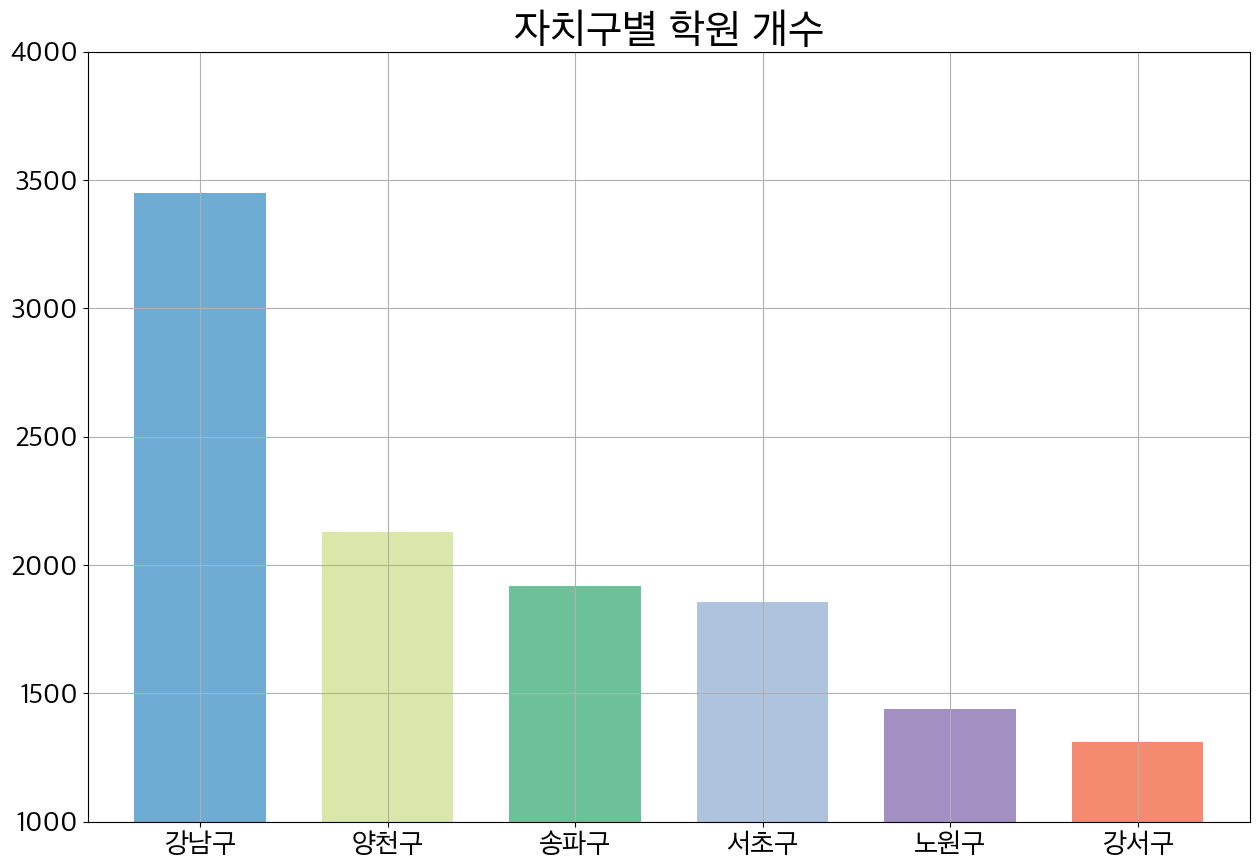

In [14]:
a=main1['행정구역명'].value_counts()
colors = ['#6EACD3', '#D9E7AA', '#6DC198', '#AEC4DE', '#A390C3', '#F48A6F'] 
plt.figure(figsize = (15,10))
b = a[:6].plot.bar(color = colors, label = ' ', width = 0.7)
plt.xticks(rotation = 0, size=20)
plt.yticks(size=20)
plt.ylim(1000, 4000)
plt.title('자치구별 학원 개수', size = 30, fontweight = 'heavy')
plt.grid(True)

<Figure size 1500x1000 with 0 Axes>

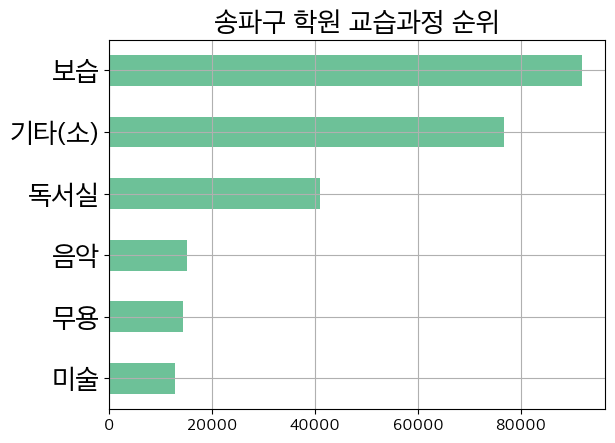

In [15]:
송파구학원 = main1.groupby("행정구역명").get_group("송파구")
송파구학원 = 송파구학원.sort_values(by = "정원합계", ascending=False)
송파구학원
송파구학원 = 송파구학원.iloc[2:,:] #정원합계 10만 이상인 학원 제거 
송파구학원
a = 송파구학원.groupby("교습과정명").sum().sort_values(by='정원합계')
a = a.iloc[:,:1]
a

plt.figure(figsize = (15,10))
a[-6:].plot.barh(color = "#6DC198", legend = None)
plt.title('송파구 학원 교습과정 순위', size = 20)
plt.savefig("송파구 학원 교습과정 순위.png")
plt.ylabel('', size=20)
plt.yticks(size=20)
plt.xticks(size=12)
plt.grid(True);


<Figure size 1500x1000 with 0 Axes>

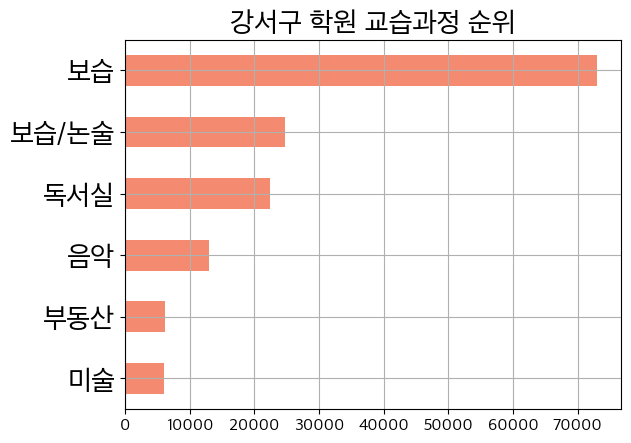

In [16]:
강서구학원 = main1.groupby("행정구역명").get_group("강서구")
강서구학원.groupby("교습과정명").sum().sort_values(by='정원합계',ascending = False)
강서구학원 = 강서구학원.sort_values(by = "정원합계", ascending=False)
강서구학원 = 강서구학원.groupby("교습과정명").sum().sort_values(by='정원합계')
a = 강서구학원.iloc[:,:1]
a

plt.figure(figsize = (15,10))
a[-6:].plot.barh(color = '#F48A6F', legend = None)
plt.title('강서구 학원 교습과정 순위', size = 20)
plt.ylabel('')
plt.yticks(size=20)
plt.xticks(size=12)
plt.grid(True);

<Figure size 1000x3000 with 0 Axes>

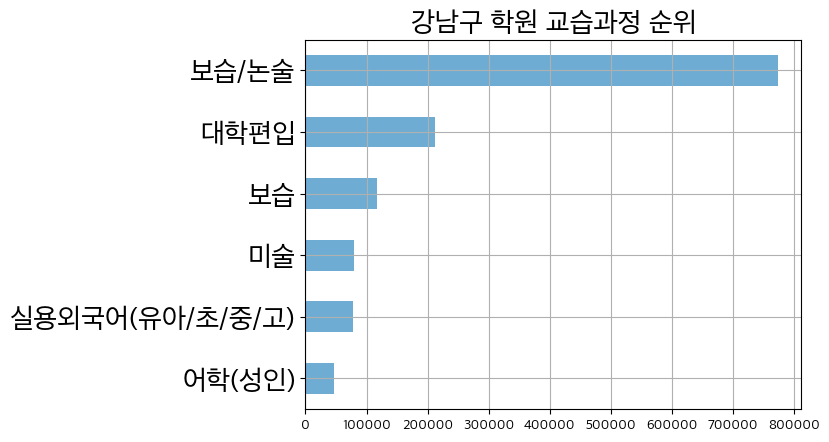

In [17]:
강남구학원 = main1.groupby("행정구역명").get_group("강남구")
강남구학원 = 강남구학원.sort_values(by='정원합계',ascending = False) #정원합계 10만 이상 데이터 삭제 
강남구학원.head(20)
강남구학원 = 강남구학원.loc[17847:, :]
강남구학원 = 강남구학원.groupby("교습과정명").sum().sort_values(by='정원합계')
강남구학원
a = 강남구학원.iloc[:,:1]
a

plt.figure(figsize = (10,30))
a[-6:].plot.barh(color = '#6EACD3', legend = None)
plt.title('강남구 학원 교습과정 순위', size = 20)
plt.ylabel('')
plt.yticks(size=20)
plt.grid(True)

<Figure size 1000x3000 with 0 Axes>

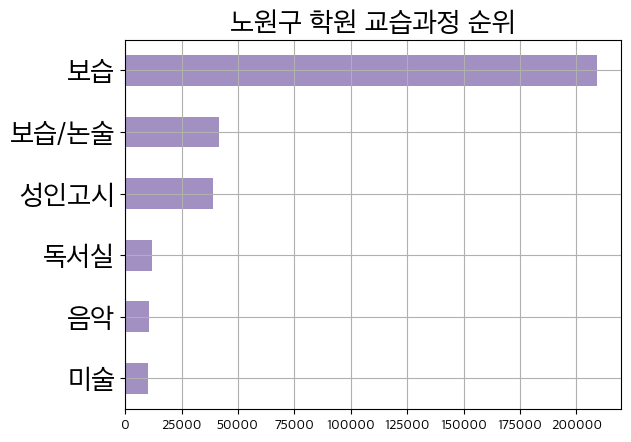

In [18]:
노원구학원 = main1.groupby("행정구역명").get_group("노원구")
노원구학원.groupby("교습과정명").sum().sort_values(by='정원합계',ascending = False)
노원구학원 = 노원구학원.sort_values(by = "정원합계", ascending=False)
노원구학원 = 노원구학원.loc[10434:,:] #정원합계 10만명 이상 삭제 
a = 노원구학원.groupby("교습과정명").sum().sort_values(by='정원합계')
a = a.iloc[:, :1]

#그래프
plt.figure(figsize = (10,30))
a[-6:].plot.barh(legend = None, color = '#A390C3')
plt.title('노원구 학원 교습과정 순위', size = 20)
plt.ylabel('')
plt.yticks(size=20)
plt.grid(True)

<Figure size 1000x3000 with 0 Axes>

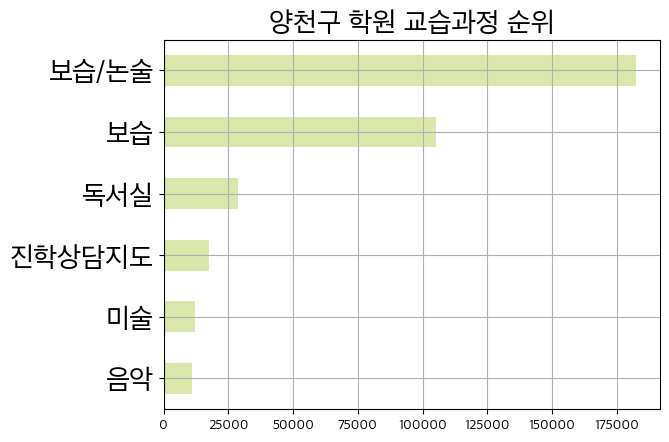

In [19]:
양천구학원 = main1.groupby("행정구역명").get_group("양천구")
양천구학원.groupby("교습과정명").sum().sort_values(by='정원합계',ascending = False)
양천구학원 = 양천구학원.sort_values(by = "정원합계", ascending=False)
양천구학원=양천구학원.iloc[1:,:] #정원합계 10만명 이상 제거 
a = 양천구학원.groupby("교습과정명").sum().sort_values(by='정원합계')
a = a.iloc[:,:1]
                    
    
plt.figure(figsize = (10,30))
a[-6:].plot.barh(legend = None, color = '#D9E7AA')
plt.title('양천구 학원 교습과정 순위', size = 20)
plt.ylabel('')
plt.yticks(size=20)
plt.grid(True)

<Figure size 1000x3000 with 0 Axes>

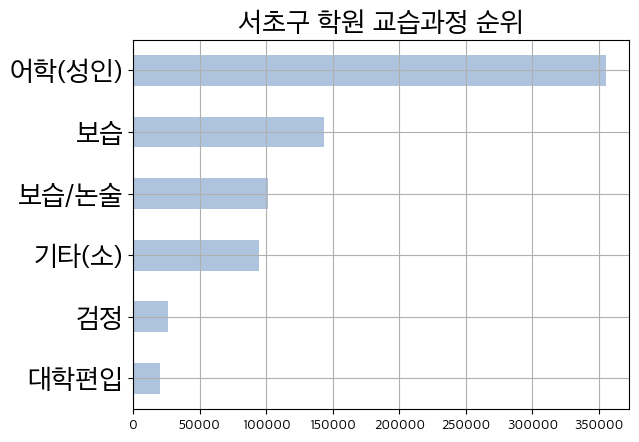

In [20]:
서초구학원 =  main1.groupby("행정구역명").get_group("서초구")
서초구학원 = 서초구학원.sort_values(by='정원합계', ascending = False)
서초구학원 = 서초구학원.iloc[4:,:]
서초구학원 = 서초구학원.groupby("교습과정명").sum().sort_values(by = '정원합계')
서초구학원
a = 서초구학원.iloc[:,:1]

#그래프
plt.figure(figsize = (10,30))
a[-6:].plot.barh(color = '#AEC4DE', legend = None)
plt.title('서초구 학원 교습과정 순위', size = 20)
plt.ylabel('')
plt.yticks(size=20)
plt.grid(True);

# main2 학교

In [21]:
main2

,학교종류명,설립구분,학교명,관할조직명,도로명주소,도로명상세주소,남녀공학구분명,고등학교구분명,산업체특별학급존재여부,고등학교일반실업구분명,특수목적고등학교계열명,입시전후기구분명,주야구분명,설립일자,개교기념일,시도교육청명,주야과정,계열명,학과명
0,각종학교(중),사립,선화예술중학교,서울특별시성동광진교육지원청,서울특별시 광진구 천호대로 664,/ 선화예술중고등학교 (능동),남여공학,NaN,N,일반계,NaN,전기,주간,19731201,19730705,서울특별시교육청,NaN,NaN,NaN
1,초등학교,공립,서울숭신초등학교,서울특별시성동광진교육지원청,서울특별시 성동구 마장로 161,(하왕십리동),남여공학,NaN,N,일반계,NaN,전기,주간,19590403,19590403,서울특별시교육청,NaN,NaN,NaN
2,중학교,공립,행당중학교,서울특별시성동광진교육지원청,서울특별시 성동구 왕십리로 189,(행당동/행당중학교),남여공학,NaN,N,일반계,NaN,전기,주간,19680806,19681002,서울특별시교육청,NaN,NaN,NaN
3,중학교,사립,한양대학교사범대학부속중학교,서울특별시성동광진교육지원청,서울특별시 성동구 마조로 42,(사근동/한양사대부속중?고등학교),남여공학,NaN,N,일반계,NaN,전기,주간,19600118,19600118,서울특별시교육청,NaN,NaN,NaN
4,중학교,공립,자양중학교,서울특별시성동광진교육지원청,서울특별시 광진구 뚝섬로41길 33,(자양동/서울자양중학교),남여공학,NaN,N,일반계,NaN,전기,주간,19840301,19840301,서울특별시교육청,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,고등학교,국립,국립국악고등학교,교육부,서울특별시 강남구 개포로22길 65,/ (개포동/ 국립국악고등학교),남여공학,특목고,N,일반계,예술계열,전기,주간,19720711,19720909,서울특별시교육청,주간,예술계,국악과
3863,특수학교,국립,한국우진학교,교육부,서울특별시 마포구 월드컵북로38길 21,/ 한국우진학교 (중동),남여공학,NaN,N,해당없음,NaN,전기,주간,20000301,20000306,서울특별시교육청,NaN,NaN,NaN
3864,특수학교,국립,서울농학교,교육부,서울특별시 종로구 필운대로 103,(신교동),남여공학,NaN,N,해당없음,NaN,전기,주간,19130401,19130401,서울특별시교육청,NaN,NaN,NaN
3865,특수학교,국립,서울맹학교,교육부,서울특별시 종로구 필운대로 97,(신교동),남여공학,NaN,N,해당없음,NaN,전기,주간,19130401,19130401,서울특별시교육청,NaN,NaN,NaN


In [22]:
#전처리

main2=main2.fillna(0)
main2['구']=main2['도로명주소'].str.split().str[1]
main2 = main2.drop_duplicates(['학교명'])

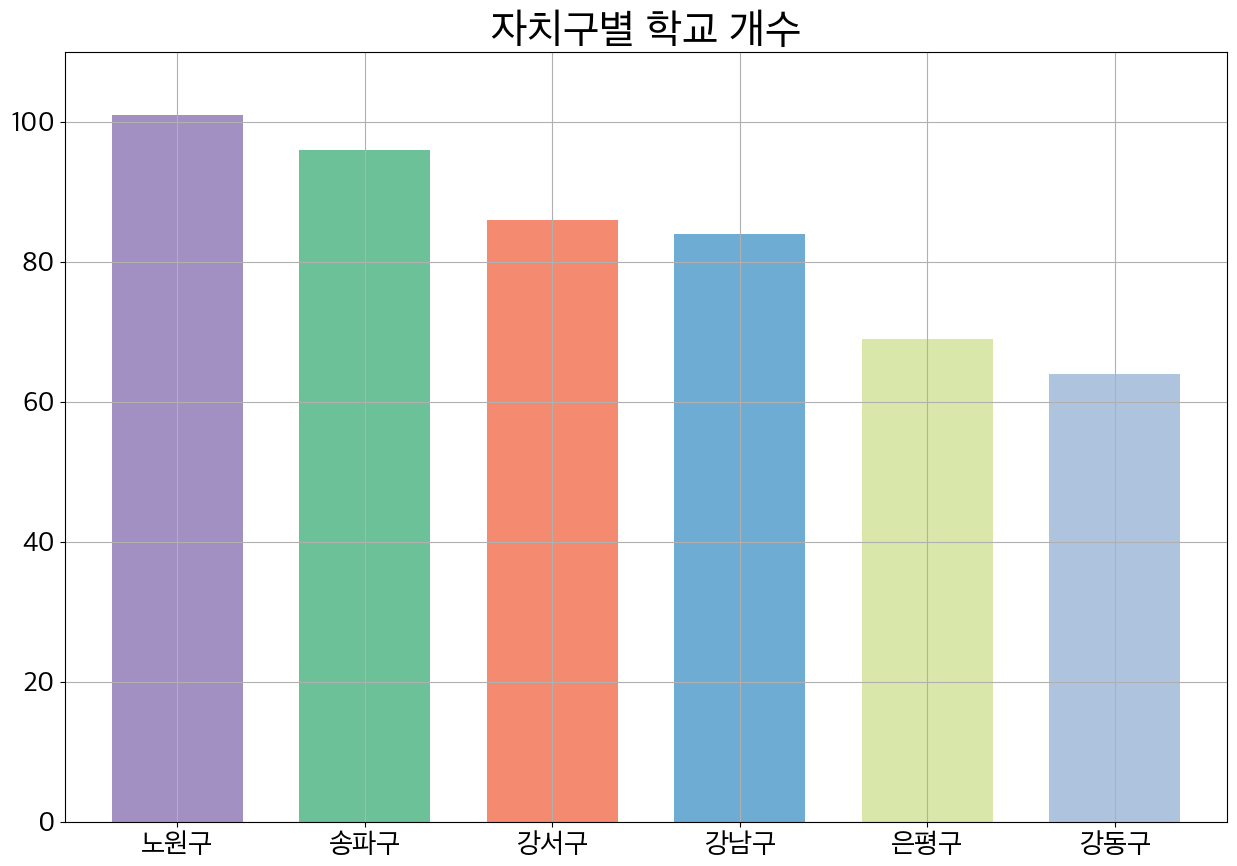

In [23]:
#자치구별 학교 개수 그래프 
a = main2['구'].value_counts()
a

colors = ['#A390C3', '#6DC198', '#F48A6F', '#6EACD3', '#D9E7AA', '#AEC4DE']
plt.figure(figsize = (15,10))
b = a[:6].plot.bar(color = colors, label = '단위: 명', width = 0.7)
plt.xticks(rotation = 0, size = 20),
plt.yticks(size=20)
plt.ylim(0, 110)
plt.title('자치구별 학교 개수', size = 30);
plt.grid(True)

In [24]:
강남구학교 = main2.groupby("구").get_group("강남구")
강남구학교['남녀공학구분명'].value_counts() #10~19세 강남구 인구 비율 남>여, 남학교개수>여학교개수

남여공학    66
남       11
여        7
Name: 남녀공학구분명, dtype: int64

In [25]:
송파구학교 = main2.groupby("구").get_group("송파구")
송파구학교['남녀공학구분명'].value_counts() #10~19세 송파구 인구 비율 남<여, 남학교개수<여학교개수

남여공학    79
여        9
남        8
Name: 남녀공학구분명, dtype: int64

In [26]:
노원구학교 = main2.groupby("구").get_group("노원구")
노원구학교['남녀공학구분명'].value_counts()

남여공학    87
남        7
여        7
Name: 남녀공학구분명, dtype: int64

In [27]:
강서구학교 = main2.groupby("구").get_group("강서구")
강서구학교['남녀공학구분명'].value_counts()

남여공학    69
남        9
여        8
Name: 남녀공학구분명, dtype: int64

In [28]:
중구학교 = main2.groupby("구").get_group("중구")
중구학교['남녀공학구분명'].value_counts()

남여공학    21
남        9
여        6
Name: 남녀공학구분명, dtype: int64

# main3 유치원

In [29]:
##전처리

#1. 중복삭제 
main3.duplicated().sum()


#2. 결측값을 0으로 대체
main3=main3.fillna(0)


#3. 데이터 타입 변경
main3['설립일']= main3['설립일'].astype('str')
main3['개원일']= main3['개원일'].astype('str')
main3['만3세학급수']= main3['만3세학급수'].astype(int)
main3['만4세학급수']= main3['만4세학급수'].astype('int')
main3['만5세학급수']= main3['만5세학급수'].astype('int')
main3['특수학급수']= main3['특수학급수'].astype('int')
main3['만3세유아수']= main3['만3세유아수'].astype('int')
main3['만4세유아수']= main3['만4세유아수'].astype('int')
main3['만5세유아수']= main3['만5세유아수'].astype('int')
main3['특수유아수']= main3['특수유아수'].astype('int')

#4.  데이터 타입을 날짜로 바꿈
main3['설립일']=pd.to_datetime(main3['설립일'])
main3['개원일']=pd.to_datetime(main3['개원일'])

#5. "구" 열 생성
main3['구'] = main3['주소'].str.split().str[1]


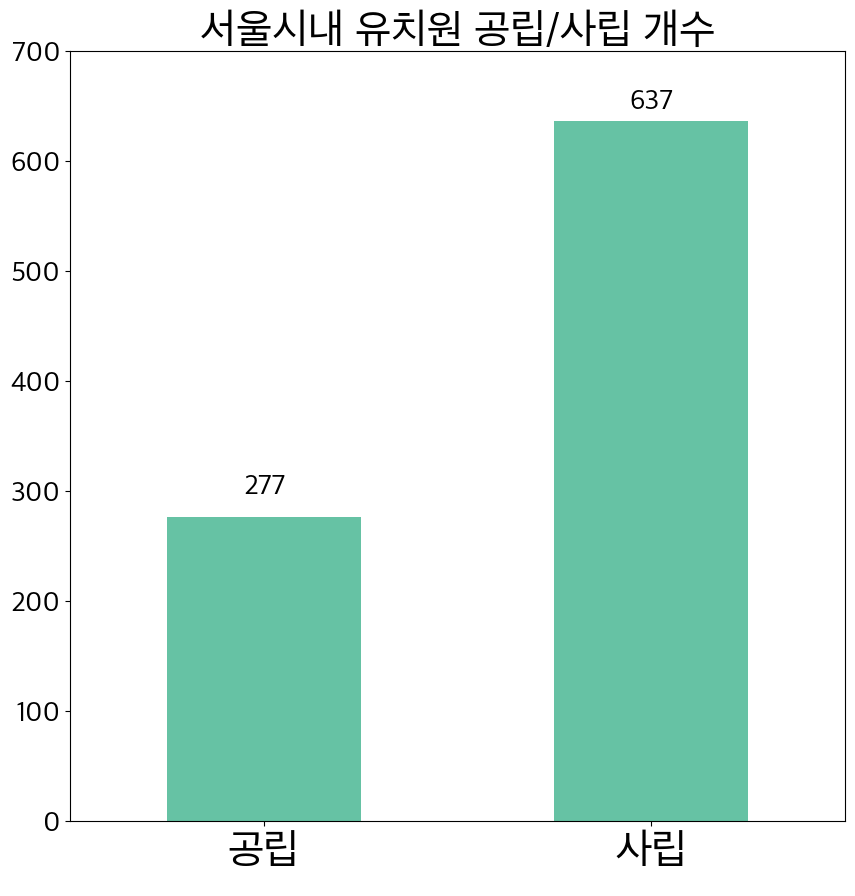

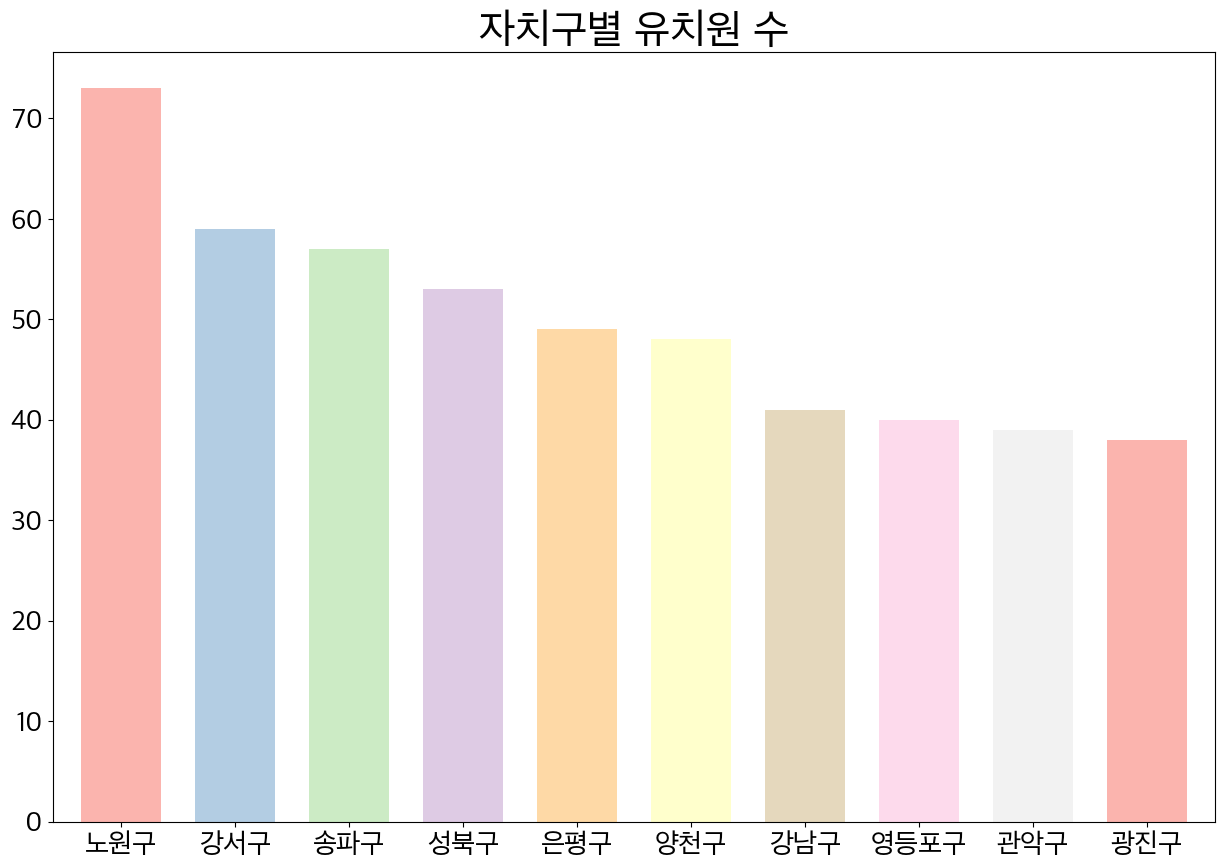

In [30]:
# # 1. <서울시내 유치원 공립/사립 개수>

#분석
main3['설립유형2'] = 0

for i in range(len(main3['설립유형'])):
    if (main3['설립유형'][i] == '사립(사인)') or (main3['설립유형'][i] == '사립(법인)'):
        main3['설립유형2'][i] = "사립"
    else:
        main3['설립유형2'][i] = "공립"
        
c=main3.groupby(['설립유형2'])['구'].count()


#시각화
plt.figure(figsize = (10,10))
cc = c.plot.bar(color = '#66C2A4')
plt.xticks(rotation = 0, size = 30);
plt.xlabel(' ')
plt.ylim(0, 700)
plt.yticks(size=20)
plt.title('서울시내 유치원 공립/사립 개수', size = 30);

plt.text(0, 277 + 20, 277, ha ='center', fontsize = 20)
plt.text(1, 637 + 10, 637, ha ='center', fontsize = 20)

#2. <자치구별 유치원 개수>

#분석
유치원수 = main3['구'].value_counts()

#시각화
colors = sns.color_palette("Pastel1")
plt.figure(figsize = (15,10))
b = 유치원수[:10].plot.bar(color = colors, label = '단위: 명', width = 0.7)
plt.xticks(rotation = 0,size=20);
plt.yticks(size=20)
plt.title('자치구별 유치원 수', size = 30);
plt.grid(False)


# main4 주민등록연양인구

In [31]:
main4

,자치구,동,구분,계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상+
0,합계,합계,계,"9,453,878","257,416.5","345,579","368,547","397,353.5","613,102.5","819,668.5",...,"706,599","702,787.5","535,174","392,366.5","293,549.5","189,601","90,257.5","31,768.5","7,074.5","1,092"
1,합계,합계,남자,"4,593,754","132,592.5","177,071","189,343.5","203,647","291,759.5","400,274",...,"346,409","333,694.5","250,507","180,478.5","131,766.5","78,511","30,666.5","8,102","1,536.5",215.5
2,합계,합계,여자,"4,860,124","124,824","168,508","179,203.5","193,706.5","321,343","419,394.5",...,"360,190","369,093","284,667","211,888","161,783","111,090","59,591","23,666.5","5,538",876.5
3,종로구,소계,계,"142,767","2,899.5","4,345","5,014","5,612.5","10,138","12,777",...,"11,728","10,976.5","8,217.5","6,154.5","5,312","3,857.5","1,903",687.5,178.5,25.5
4,종로구,소계,남자,"69,386","1,460","2,202.5","2,491.5","2,799","4,672","6,490.5",...,"6,014.5","5,506","4,056.5","2,813","2,283","1,587.5",724,196.5,56.5,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,강동구,상일1동,남자,"17,646",960,"1,422","1,104.5",769,926.5,990,...,"1,166.5","1,236",908.5,513.5,312,118,45,11.5,2,-
1352,강동구,상일1동,여자,"18,095",924,"1,309.5",999,808.5,892.5,902.5,...,"1,308","1,310.5",921,495.5,259.5,173,113,60,13,1
1353,강동구,상일2동,계,"9,224.5",345.5,423.5,701.5,565.5,719.5,621.5,...,602,497,413.5,330,238.5,186.5,97.5,42,7,4
1354,강동구,상일2동,남자,"4,364",171.5,202.5,374,278,322,291,...,304.5,228,183,140,110,75,32,10.5,4.5,-


In [32]:
# 전처리

a = main4.groupby("동").get_group("소계")
a = a.set_index("자치구", drop=True)
a = a.drop(columns='동')

for i in range(len(a.columns)):
    b = a.columns[i]
    a[b] = a[b].str.replace(",", '')

for i in range(3, 23):
    b = a.columns[i]
    a[b] = a[b].astype('float')

al = a.groupby("구분").get_group("계")
al['0~4세'] = al['0~4세'].astype('float')
al = al.drop(columns=["계", "구분"])

boy = a.groupby("구분").get_group("남자")
boy = boy.drop(columns=["계", "구분"])

girl = a.groupby("구분").get_group("여자")
girl = girl.drop(columns=["계", "구분"])

In [33]:
# 분석

for i in range(len(al.columns)):
    b = al.columns[i]
    print(b)
    print('MAX', al.index[al[b] == al[b].max()])
    print('MIN', al.index[al[b] == al[b].min()])

0~4세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['종로구'], dtype='object', name='자치구')
5~9세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
10~14세
MAX Index(['강남구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
15~19세
MAX Index(['강남구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
20~24세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
25~29세
MAX Index(['관악구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
30~34세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['종로구'], dtype='object', name='자치구')
35~39세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['종로구'], dtype='object', name='자치구')
40~44세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
45~49세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
5

In [34]:
for i in range(len(boy.columns)):
    b = boy.columns[i]
    print(b)
    print('MAX',boy.index[boy[b] == boy[b].max()])
    print('MIN',boy.index[boy[b] == boy[b].min()])

0~4세
MAX Index(['강서구'], dtype='object', name='자치구')
MIN Index(['송파구'], dtype='object', name='자치구')
5~9세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
10~14세
MAX Index(['강남구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
15~19세
MAX Index(['강남구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
20~24세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
25~29세
MAX Index(['관악구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
30~34세
MAX Index(['관악구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
35~39세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['종로구'], dtype='object', name='자치구')
40~44세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
45~49세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
50

In [35]:
for i in range(len(girl.columns)):
    b = girl.columns[i]
    print(b)
    print('MAX',girl.index[girl[b] == girl[b].max()])
    print('MIN',girl.index[girl[b] == girl[b].min()])

0~4세
MAX Index(['강서구'], dtype='object', name='자치구')
MIN Index(['송파구'], dtype='object', name='자치구')
5~9세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
10~14세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
15~19세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
20~24세
MAX Index(['관악구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
25~29세
MAX Index(['관악구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
30~34세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['종로구'], dtype='object', name='자치구')
35~39세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['종로구'], dtype='object', name='자치구')
40~44세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
45~49세
MAX Index(['송파구'], dtype='object', name='자치구')
MIN Index(['중구'], dtype='object', name='자치구')
5

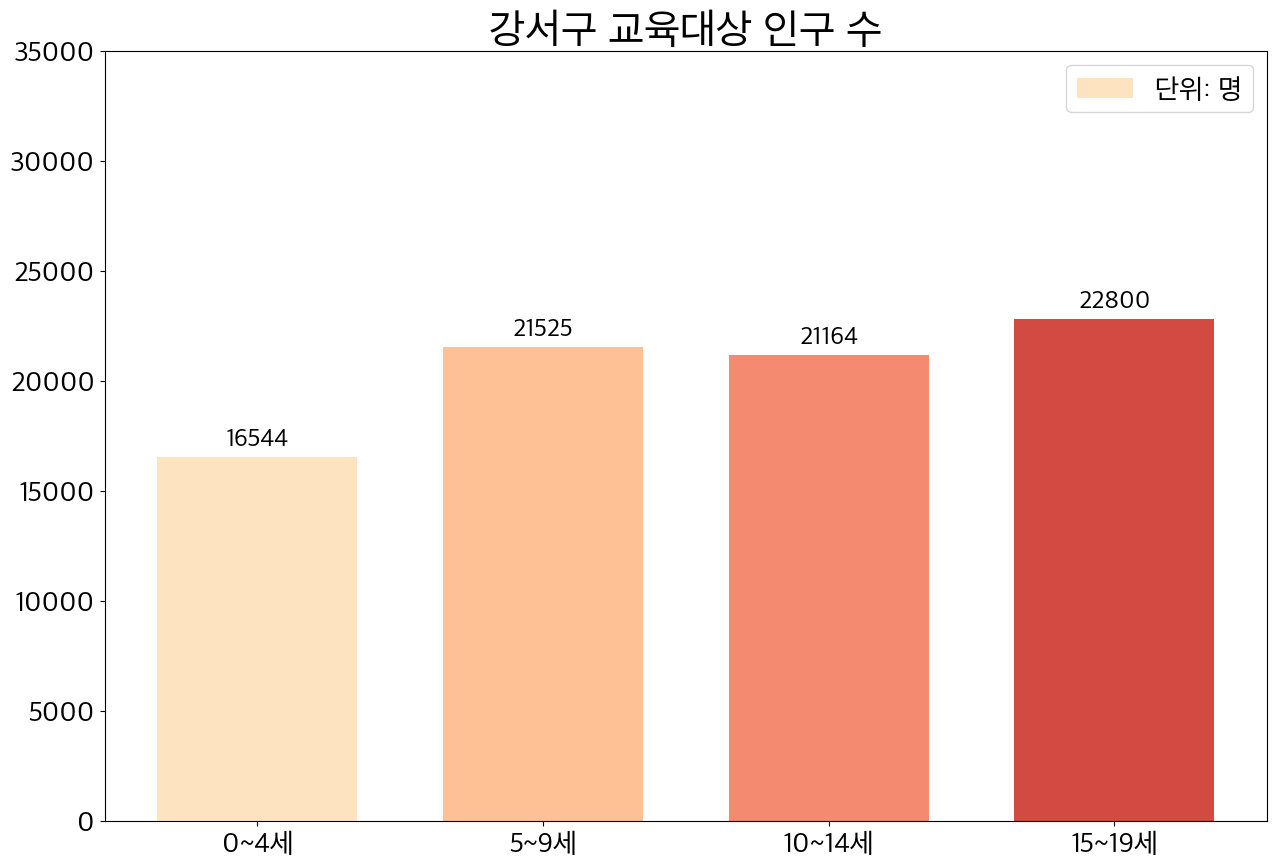

In [36]:
#시각화 

#<강서구 교육대상 인구 수 >
강서구 = al.groupby('자치구').get_group("강서구")
강서구학생 = 강서구.iloc[:,:4]
강서구학생

colors = sns.color_palette('OrRd', len(강서구학생.columns))
plt.figure(figsize = (15,10))
강서구bar = plt.bar(강서구학생.T.index, 강서구학생.T['강서구'], color = colors, alpha = 0.8, label = '단위: 명', width = 0.7)
plt.ylim(0, 35000)
plt.title('강서구 교육대상 인구 수', size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.savefig('강서구 교육대상 인구수.png', dpi=100)
plt.legend(fontsize = 20)

for idx, rect in enumerate(강서구bar):
    plt.text(idx, rect.get_height() + 500, int(rect.get_height()), ha='center', fontsize = 18)

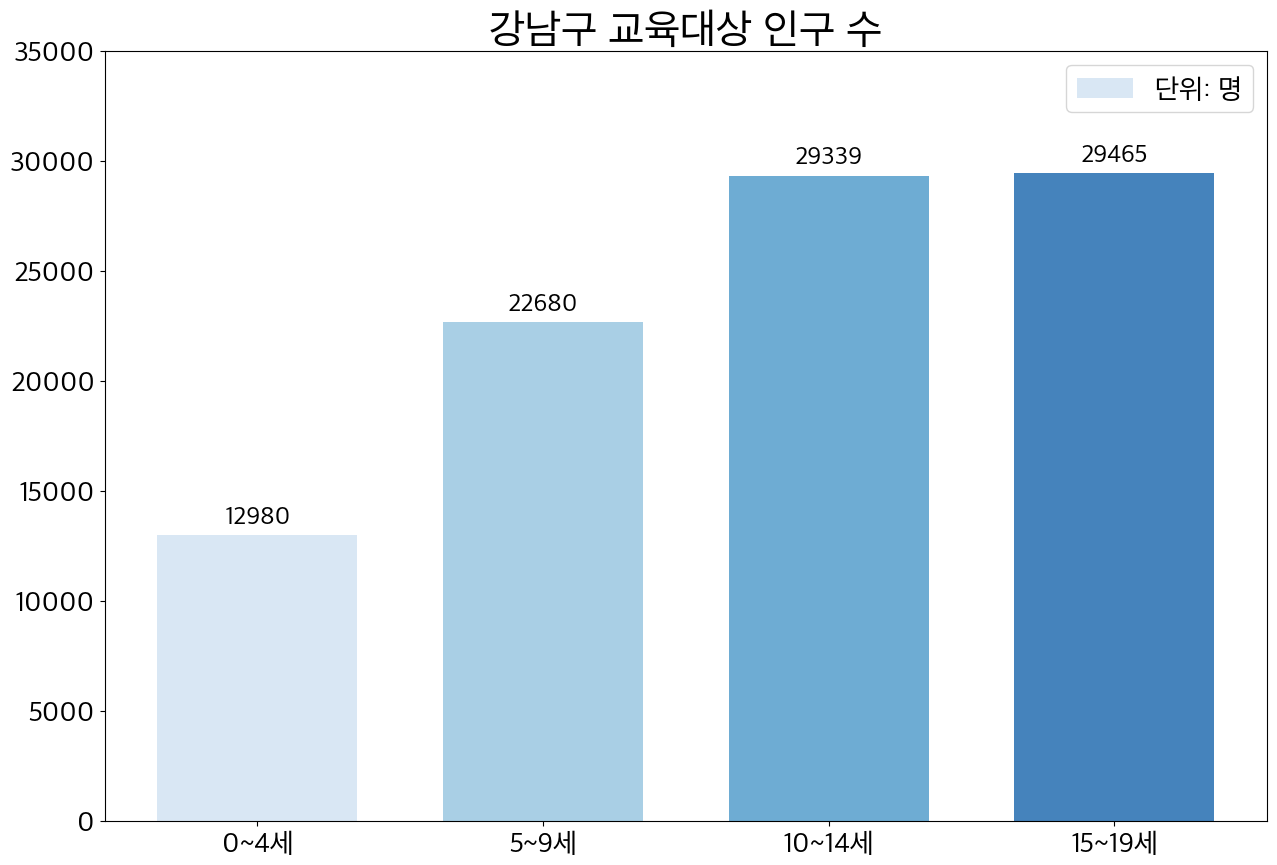

In [37]:
#<강남구 교육대상 인구 수 >

강남구학생=al.groupby('자치구').get_group("강남구")
강남구학생 = 강남구학생.iloc[:,:4]
len(강남구학생.columns)
# 58804

colors = sns.color_palette('Blues', len(강남구학생.columns))
plt.figure(figsize = (15,10))
강남구bar = plt.bar(강남구학생.T.index, 강남구학생.T['강남구'], color = colors, alpha = 0.8, label = '단위: 명', width = 0.7)
plt.ylim(0, 35000)
plt.title('강남구 교육대상 인구 수', size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.savefig('강남구 교육대상 인구수.png', dpi=100)
plt.legend(fontsize = 20)

for idx, rect in enumerate(강남구bar):
    plt.text(idx, rect.get_height() + 500, int(rect.get_height()), ha='center', fontsize = 18)

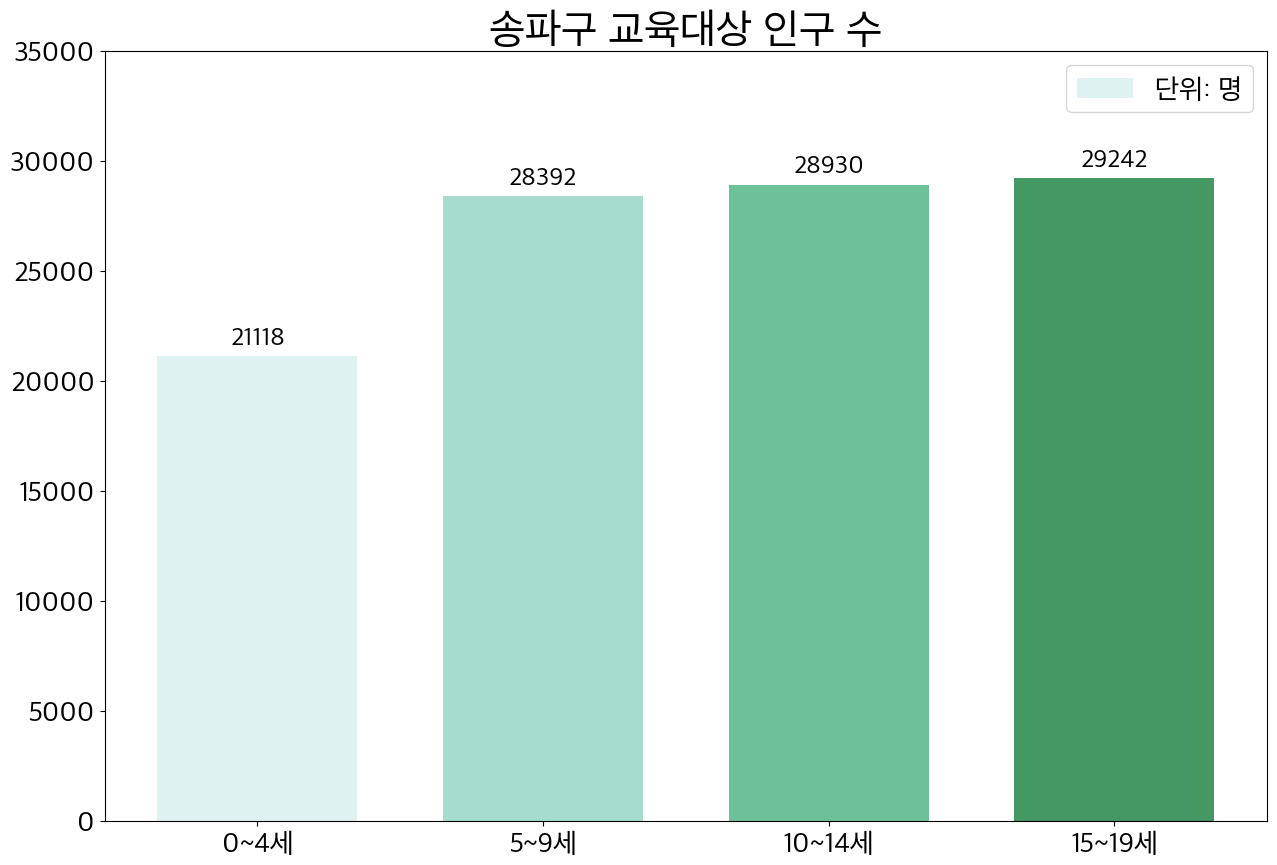

In [38]:
#<송파구 교육대상 인구 수 >

al.groupby('자치구').get_group("송파구")
# 58172


송파구학생=al.groupby('자치구').get_group("송파구")
송파구학생 = 송파구학생.iloc[:,:4]
len(송파구학생.columns)
# 58804

colors = sns.color_palette('BuGn', len(송파구학생.columns))
plt.figure(figsize = (15,10))
송파구bar = plt.bar(송파구학생.T.index, 송파구학생.T['송파구'], color = colors, alpha = 0.8, label = '단위: 명', width = 0.7)
plt.ylim(0, 35000)
plt.title('송파구 교육대상 인구 수', size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.savefig('송파구 교육대상 인구수.png', dpi=100)
plt.legend(fontsize = 20)

for idx, rect in enumerate(송파구bar):
    plt.text(idx, rect.get_height() + 500, int(rect.get_height()), ha='center', fontsize = 18)
    



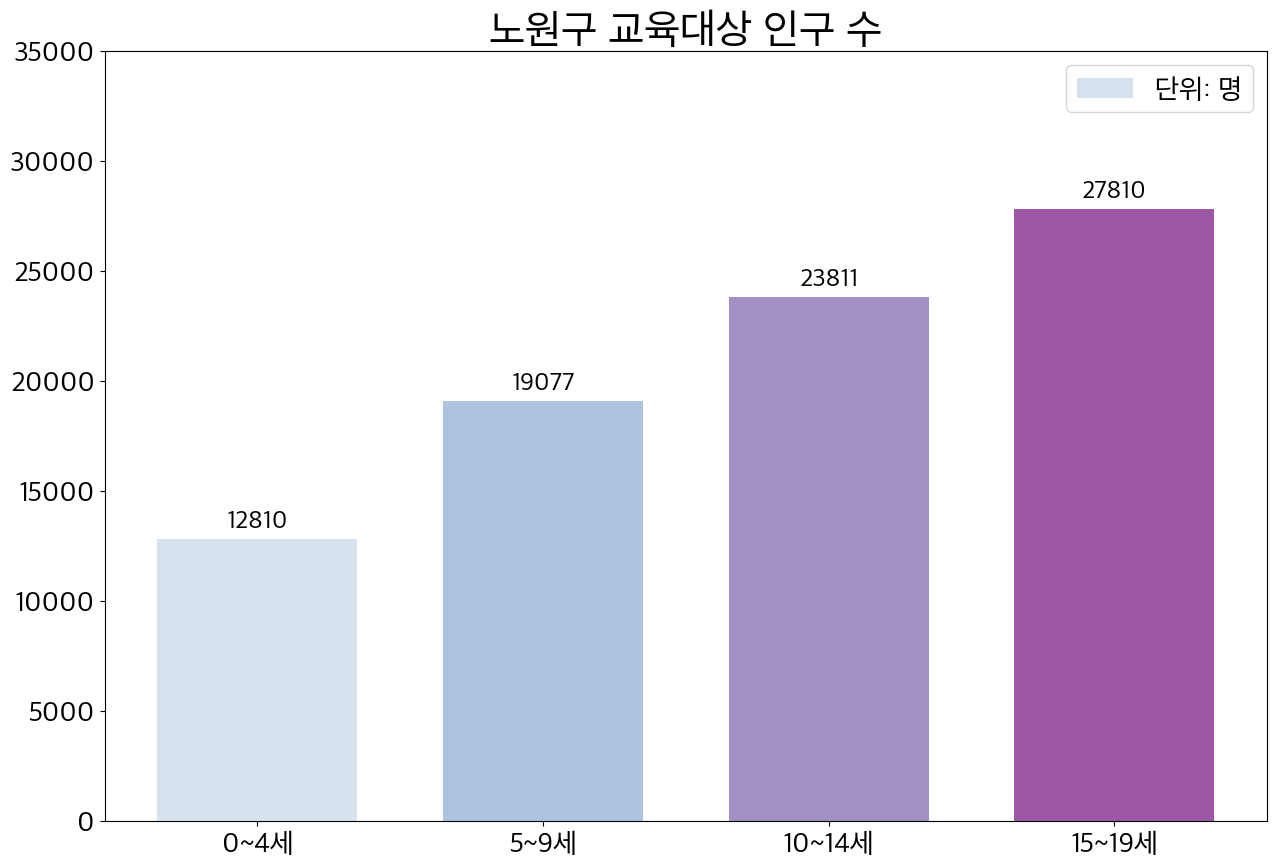

In [39]:
#<노원구 교육대상 인구 수 >

al.groupby('자치구').get_group("노원구")
#51621

노원구학생=al.groupby('자치구').get_group("노원구")
노원구학생 = 노원구학생.iloc[:,:4]
len(노원구학생.columns)
# 58804

colors = sns.color_palette('BuPu', len(노원구학생.columns))
plt.figure(figsize = (15,10))
노원구bar = plt.bar(노원구학생.T.index, 노원구학생.T['노원구'], color = colors, alpha = 0.8, label = '단위: 명', width = 0.7)
plt.ylim(0, 35000)
plt.title('노원구 교육대상 인구 수', size = 30, fontweight = 'bold')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.savefig('노원구 교육대상 인구수.png', dpi=100)
plt.legend(fontsize = 20)

for idx, rect in enumerate(노원구bar):
    plt.text(idx, rect.get_height() + 500, int(rect.get_height()), ha='center', fontsize = 18)

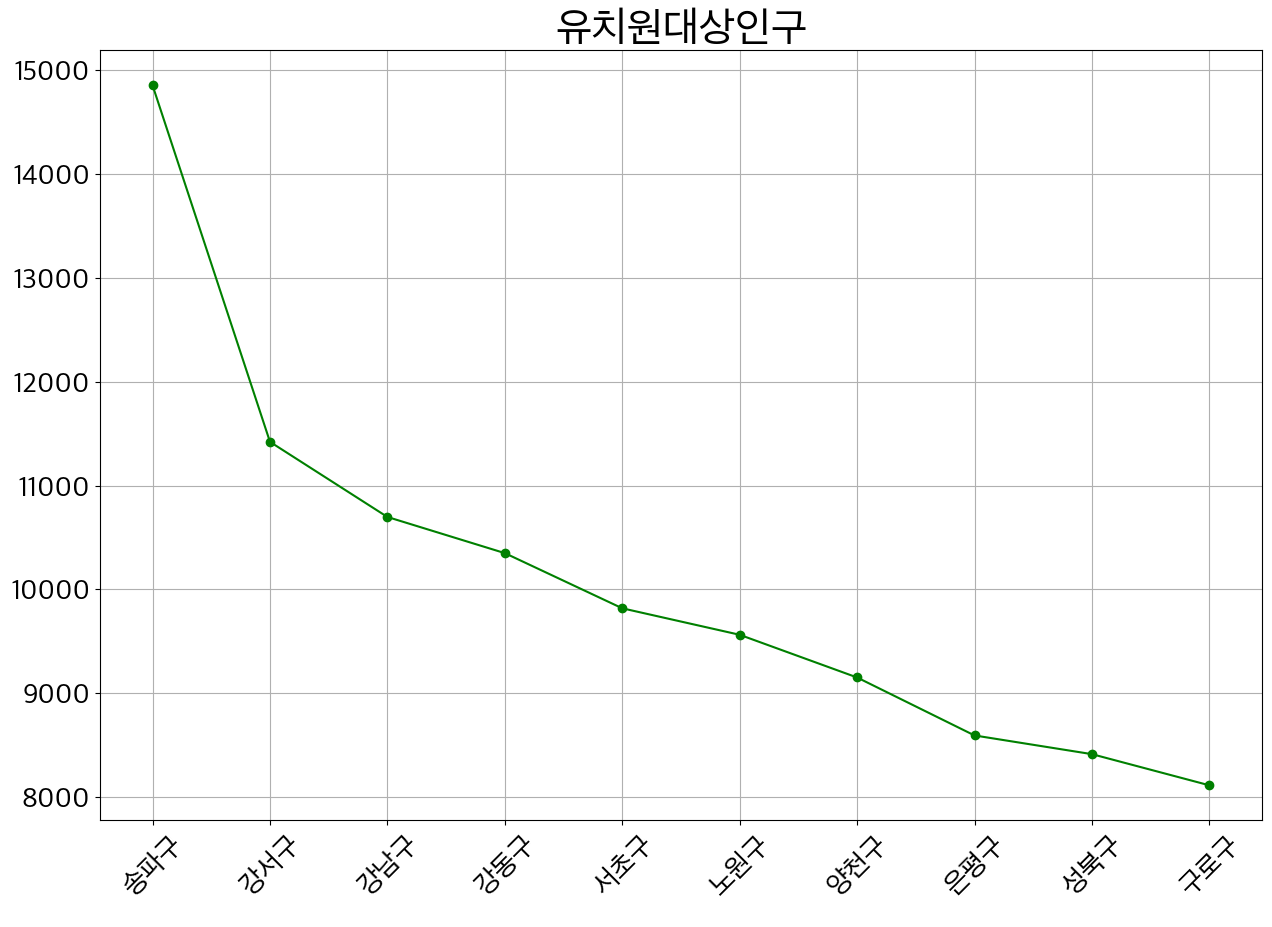

In [40]:
#<유치원 대상 인구 >

al['유치원대상인구'] = ((al["0~4세"] + al["5~9세"]) // 10) * 3 
al['0~9세'] = al["0~4세"] + al["5~9세"]
a = al.loc[:,'유치원대상인구'].sort_values(ascending = False)
plt.figure(figsize = (15,10))
plt.plot(a[:10], marker = 'o', color = 'Green')
plt.title('유치원대상인구', size = 30)
plt.xticks(size = 20, rotation = 45)
plt.yticks(size = 20)
plt.xlabel(' ')
plt.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


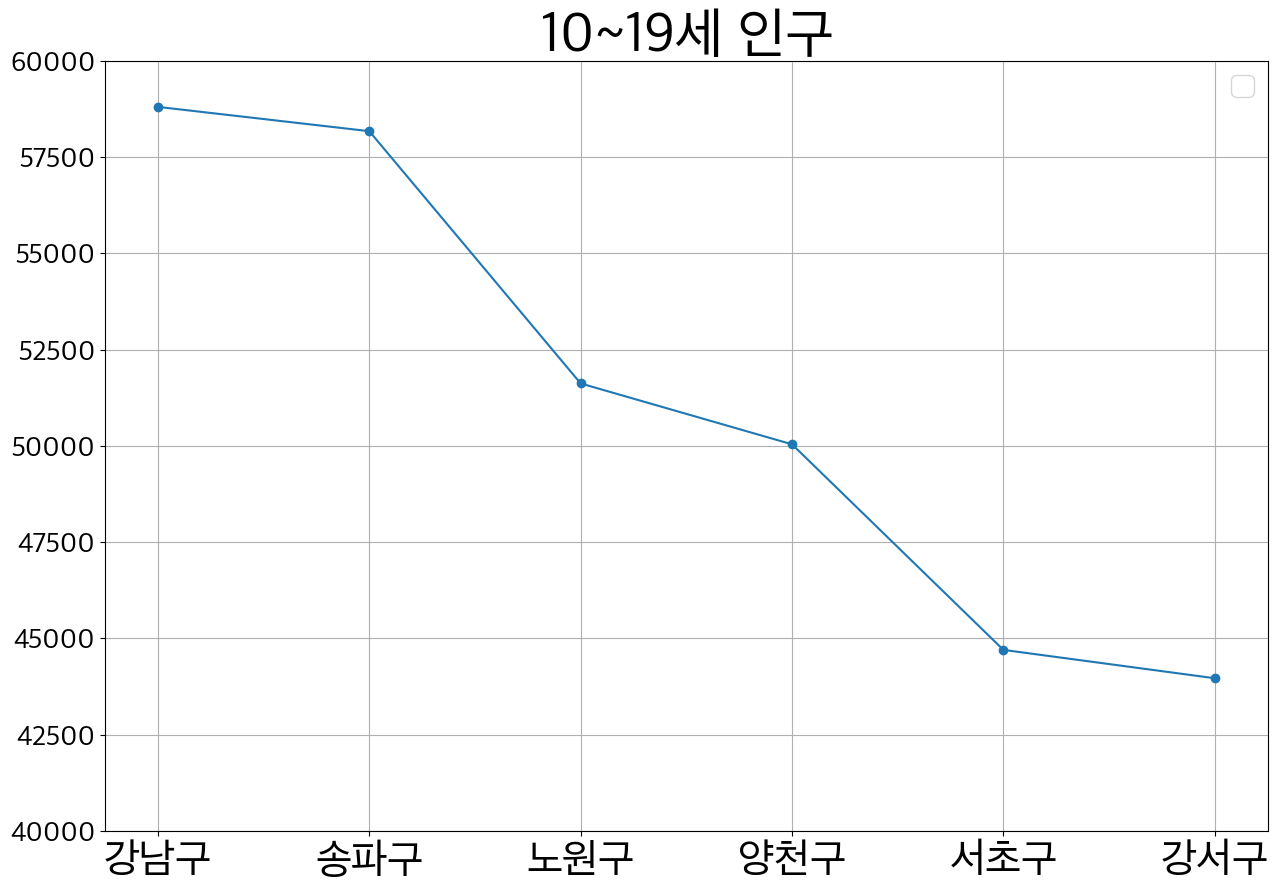

In [41]:
#<학원대상인구(10~19세) 순위>

학원인구 = al.iloc[:,2:4]
학원인구["sum"] = 학원인구['10~14세'] + 학원인구['15~19세']
학원인구 = 학원인구.sort_values(by = 'sum', ascending = False)
학원인구 = 학원인구.iloc[:6, 2:]


plt.figure(figsize = (15,10))
plt.plot(학원인구, marker='o')
plt.ylim(40000, 60000)
plt.title('10~19세 인구', size = 40)
plt.xticks(size = 30)
plt.yticks(size = 20)
plt.legend(fontsize = 20)

plt.grid(True)
    

# # colors = ['#6EACD3', '#D9E7AA', '#6DC198', '#AEC4DE', '#A390C3', '#F48A6F']
# colors = ['#6EACD3', '#6DC198', '#A390C3', '#D9E7AA', '#AEC4DE', '#F48A6F']




# sub2 서울시 주민등록인구 (동별) 통계

In [42]:
sub2

,자치구,동,세대,총인구,남자인구,여자인구,한국인인구,한국인남자인구,한국인여자인구,외국인인구,외국인남자인구,외국인여자인구,세대당인구,65세이상고령자
0,자치구,동,세대,합계,합계,합계,한국인,한국인,한국인,외국인,외국인,외국인,세대당인구,65세이상고령자
1,자치구,동,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,합계,합계,"4,426,007","9,736,027","4,721,977","5,014,050","9,509,458","4,618,040","4,891,418","226,569","103,937","122,632",2.15,"1,605,416"
3,종로구,소계,"73,494","153,789","74,186","79,603","144,683","70,183","74,500","9,106","4,003","5,103",1.97,"27,818"
4,종로구,사직동,"4,696","9,636","4,353","5,283","9,372","4,200","5,172",264,153,111,2,"1,774"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,강동구,천호2동,"17,473","33,753","16,563","17,190","33,154","16,280","16,874",599,283,316,1.9,"5,913"
450,강동구,길동,"21,820","45,973","22,405","23,568","45,653","22,299","23,354",320,106,214,2.09,"7,986"
451,강동구,강일동,"12,857","32,982","15,801","17,181","32,794","15,740","17,054",188,61,127,2.55,"5,321"
452,강동구,상일1동,"13,496","38,929","19,197","19,732","38,834","19,154","19,680",95,43,52,2.88,"4,396"


In [43]:
#전처리

a = sub2.groupby("동").get_group("소계")
a = a.set_index("자치구")
a['세대'] = a['세대'].str.replace(",", '')
a['세대'] = a['세대'].astype('int')
a = a.drop(columns = '동')

a['총인구'] = a['총인구'].str.replace(",", '')
a['남자인구'] = a['남자인구'].str.replace(",", '')
a['여자인구'] = a['여자인구'].str.replace(",", '')
a['한국인인구'] = a['한국인인구'].str.replace(",", '')
a['한국인남자인구'] = a['한국인남자인구'].str.replace(",", '')
a['한국인여자인구'] = a['한국인여자인구'].str.replace(",", '')
a['외국인인구'] = a['외국인인구'].str.replace(",", '')
a['외국인남자인구'] = a['외국인남자인구'].str.replace(",", '')
a['외국인여자인구'] = a['외국인여자인구'].str.replace(",", '')
a['세대당인구'] = a['세대당인구'].str.replace(",", '')
a['65세이상고령자'] = a['65세이상고령자'].str.replace(",", '')

a['총인구'] = a['총인구'].astype('int')
a['남자인구'] = a['남자인구'].astype('int')
a['여자인구'] =a['여자인구'].astype('int')
a['한국인인구'] =a['한국인인구'].astype('int')
a['한국인남자인구'] =a['한국인남자인구'].astype('int')
a['한국인여자인구'] =a['한국인여자인구'].astype('int')
a['외국인인구'] =a['외국인인구'].astype('int')
a['외국인남자인구'] =a['외국인남자인구'].astype('int')
a['외국인여자인구'] =a['외국인여자인구'].astype('int')
a['세대당인구'] = a['세대당인구'].astype('float')
a['65세이상고령자'] =a['65세이상고령자'].astype('int')
    

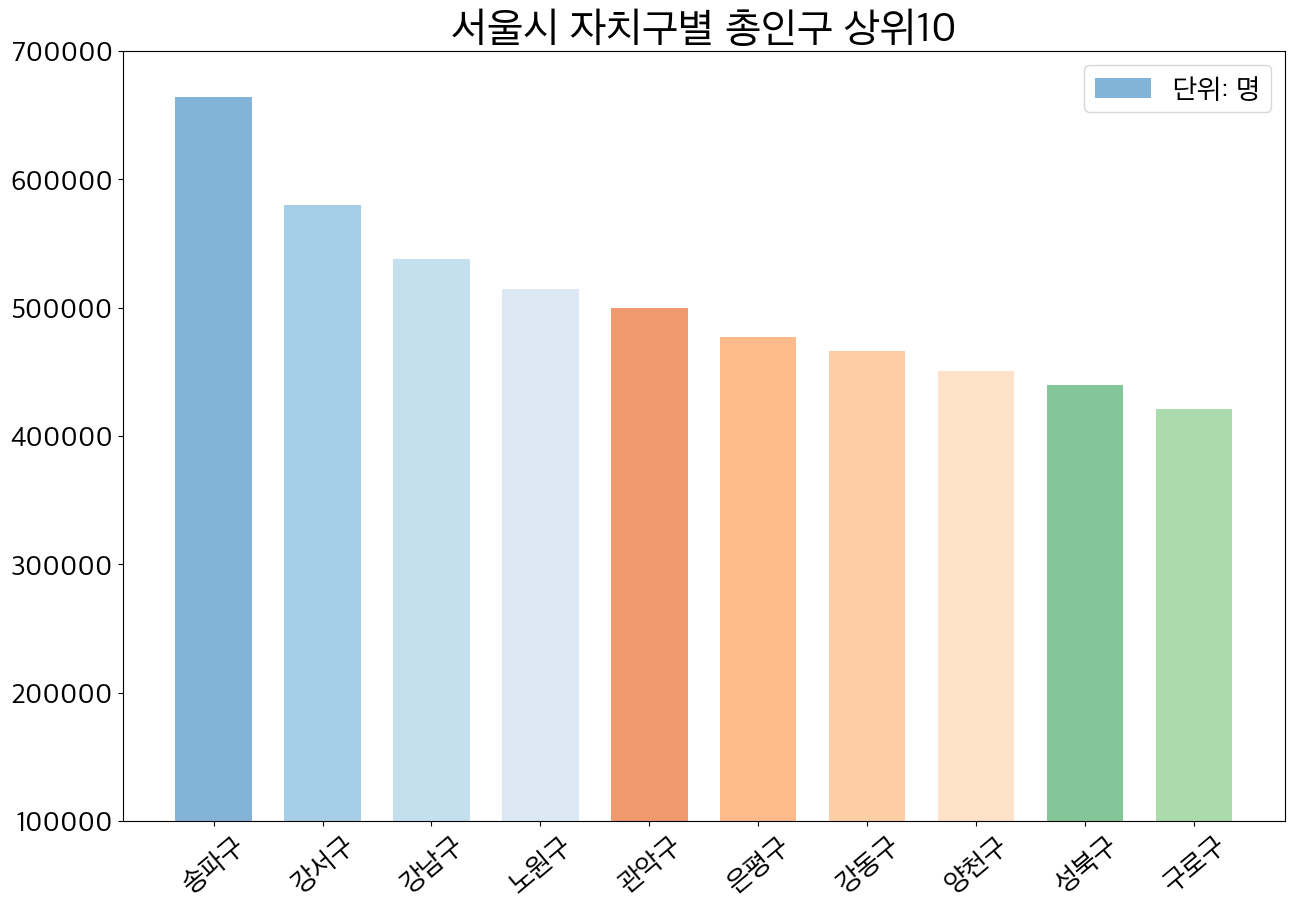

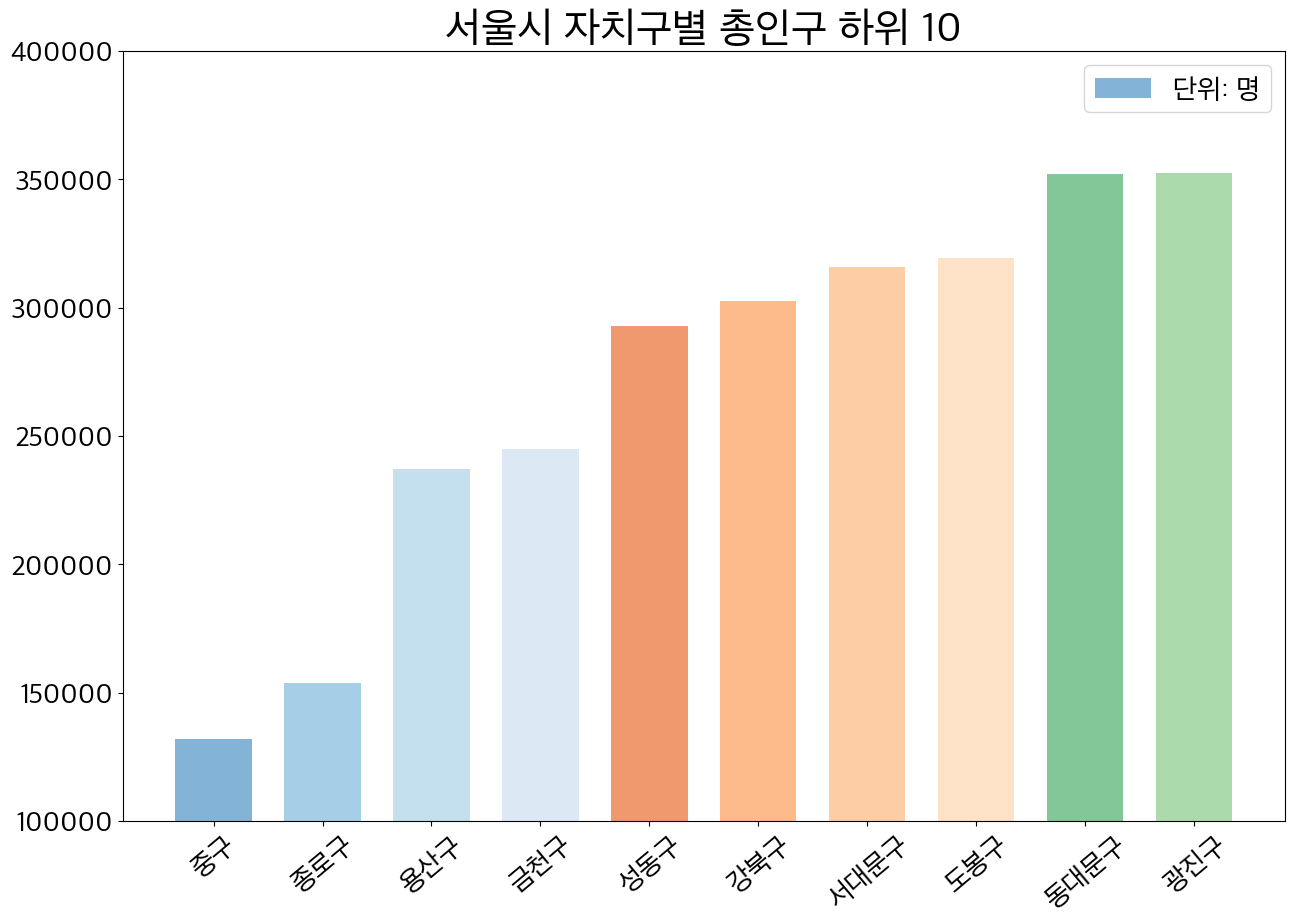

In [44]:
a = a.sort_values(by='총인구', ascending = False) 
상위a = a.iloc[:10,:]
하위a = a.iloc[-1:14:-1, :]


#<서울시 자치구별 총인구 상위 10>
colors = sns.color_palette('tab20c', len(상위a.index))
plt.figure(figsize = (15,10))
plt.bar(상위a.index, 상위a['총인구'], color = colors, alpha = 0.6, label = '단위: 명', width = 0.7)
plt.ylim(100000, 700000)
plt.title('서울시 자치구별 총인구 상위10', size = 30, weight='heavy')
plt.xticks(size = 20, rotation = 40)
plt.yticks(size = 20)
plt.savefig('서울시 자치구별 총인구 상위10.png', dpi=100, transparent = True)
plt.legend(fontsize = 20)


#<서울시 자치구별 총인구 하위 10>
colors = sns.color_palette('tab20c', len(하위a.index))
plt.figure(figsize = (15,10))
plt.bar(하위a.index, 하위a['총인구'], color = colors, alpha = 0.6, label = '단위: 명', width = 0.7)
plt.ylim(100000, 400000)
plt.title('서울시 자치구별 총인구 하위 10', size = 30)
plt.xticks(size = 20, rotation = 40)
plt.yticks(size = 20)
plt.savefig('서울시 자치구별 총인구 하위 10.png', dpi=100)
plt.legend(fontsize = 20)

# sub3 유치원 통학차량

In [45]:
#전처리

sub3['탑승가능인원']=0
for i in range(len(sub3)):
    sub3['신고차량수'][i]=sub3['9인승신고차량수'][i]+sub3['12인승신고차량수'][i]+sub3['15인승신고차량수'][i]
    sub3['탑승가능인원'][i]=sub3['9인승신고차량수'][i]*9+sub3['12인승신고차량수'][i]*12+sub3['15인승신고차량수'][i]*15
    
sub3['행정구역명']=0
for i in range(len(sub3)):
    sub3['행정구역명'][i]=sub3['주소'][i].split()[1]

<Figure size 3000x1000 with 0 Axes>

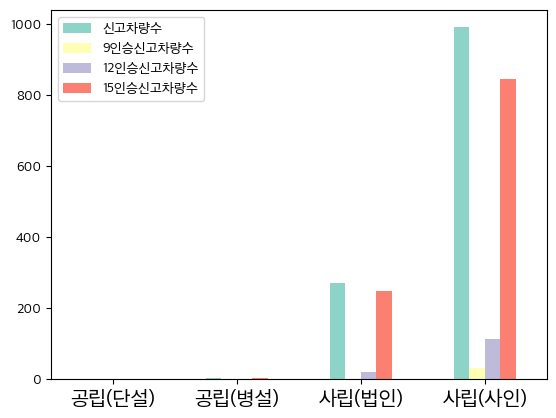

In [46]:
#분석

sub3.groupby('행정구역명').sum()
sub3.groupby('설립유형').count()
설립유형별버스 = sub3.groupby('설립유형').sum()
설립유형별버스.drop(columns = '탑승가능인원', inplace= True)
사립버스 = 설립유형별버스.iloc[2:, :]
공립버스 = 설립유형별버스.iloc[:2, :]

colors = sns.color_palette("Set3")
plt.figure(figsize = (30,10))
설립유형별버스.plot.bar(color = colors);
plt.xticks(rotation = 0, size=15);
plt.legend(loc = 'best')
plt.ylabel('')
plt.xlabel('');
plt.savefig("버스.png", dpi = 100)

# 분석+

In [50]:
pop=pd.read_excel('data/전처리_서울시 주민등록연앙인구(연령별구별) 통계.xlsx')
cramschool=pd.read_csv('data/서울시 학원 교습소정보_입시학원.csv', encoding='cp949')

In [51]:
# <학원데이터 전처리>
# 학원: '일시수용능력인원합계'가  701 이상인 경우는 온라인 학원이라 판단하고 제거함.
cramschool=cramschool[cramschool.일시수용능력인원합계<=700]

# 인덱스는 자치구명으로 통일
cramschool.rename(columns={'행정구역명':'자치구명'}, inplace=True)


# <상관도를 분석할 데이터프래임 만들기>

# A
A=pop[['자치구명', '0~4세', '5~9세', '10~14세', '15~19세', '20~24세', '25~29세', '30~34세','35~39세', '40~44세', '45~49세', '50~54세', '55~59세', '60~64세', '65~69세','70~74세', '75~79세', '80~84세', '85~89세', '90~94세', '95~99세', '100세 이상+']]
A.set_index('자치구명', inplace=True)
A=A.drop('sum')
A['입시학원_개수']=cramschool['자치구명'].value_counts()
A['입시학원_수용인원수']=cramschool.groupby('자치구명')[['일시수용능력인원합계']].sum()
#B
B=pop[['자치구명','인구이동']]
B.set_index('자치구명', inplace=True)
B=B.drop('sum')
B['입시학원_개수']=cramschool['자치구명'].value_counts()
B['입시학원_수용인원수']=cramschool.groupby('자치구명')[['일시수용능력인원합계']].sum()

In [52]:
qq = A.corr(method='pearson')['입시학원_개수']

In [53]:
qq = qq[:21]

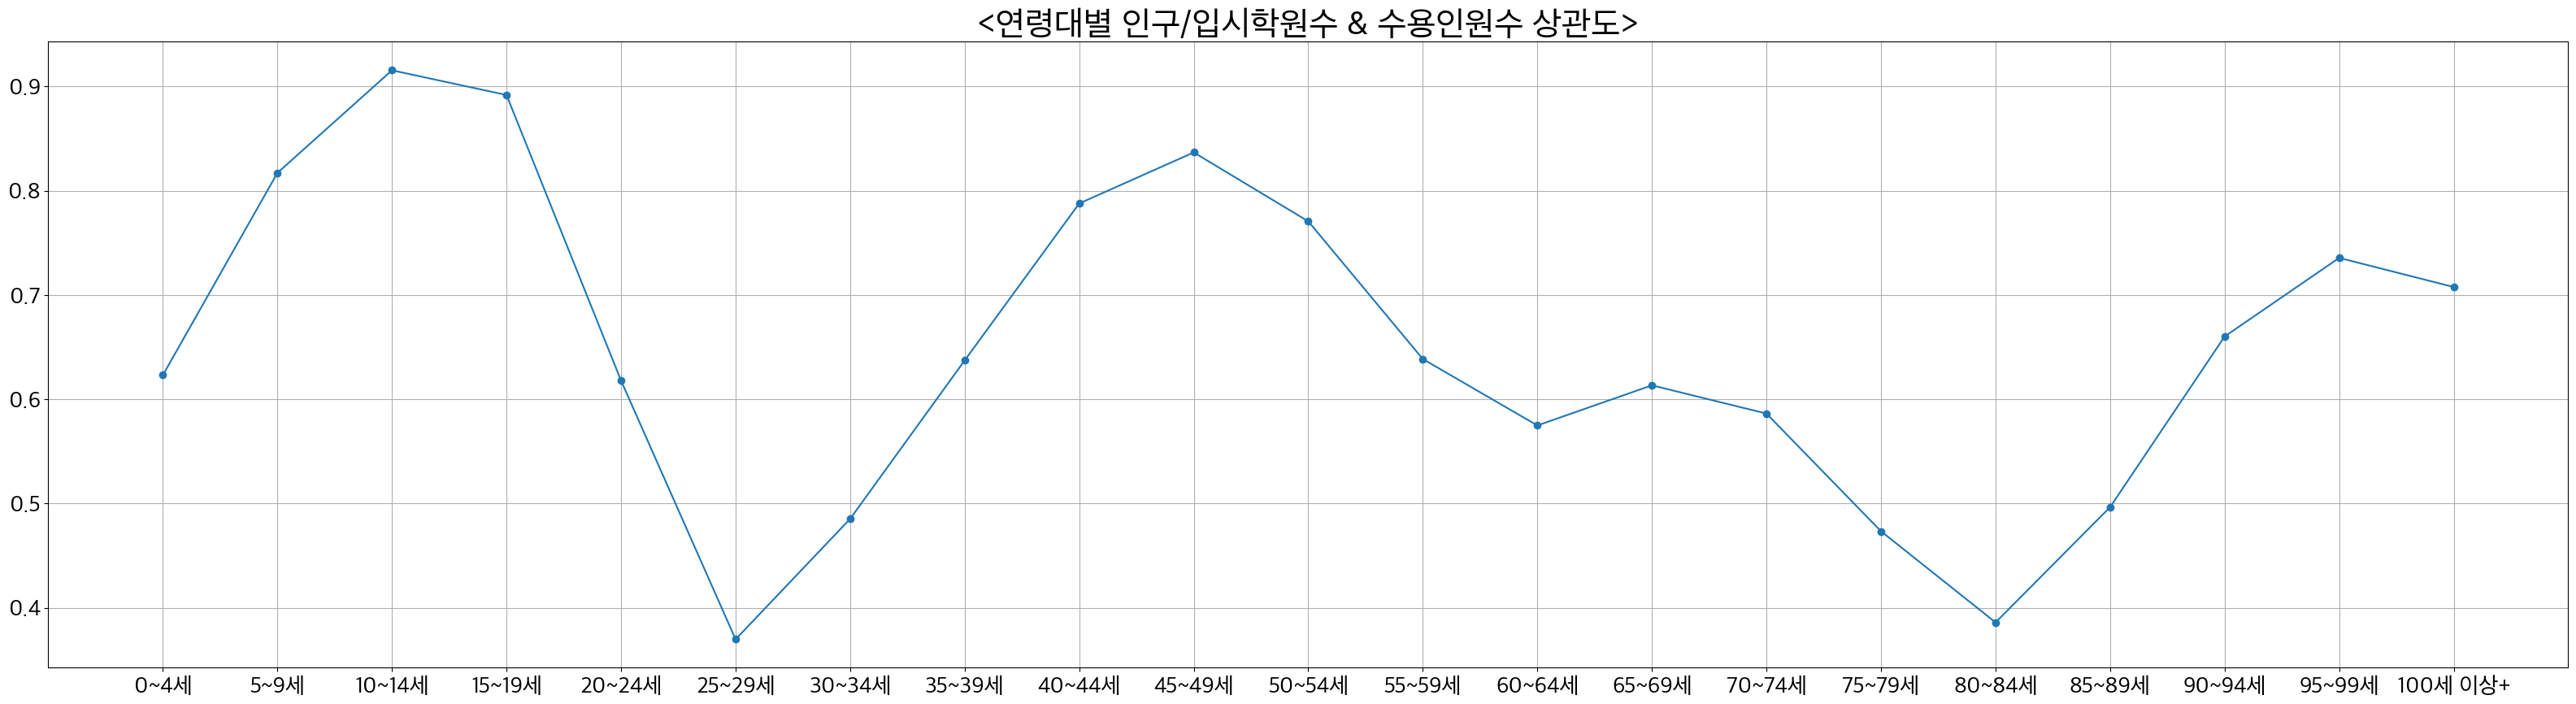

In [54]:
# <연령대별 인구수와 입시학원의 시설수 & 수용인원수 상관도> 바차트
plt.figure(figsize=(40,10))
plt.plot(qq, marker= 'o') # A.corr(method='pearson') :상관도 계산 결과
plt.xticks(size=20)
plt.yticks(size=20)
plt.title('<연령대별 인구/입시학원수 & 수용인원수 상관도>', size=30)
plt.grid(True)

In [55]:
A = A.sort_values(by='입시학원_수용인원수')
A

,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상+,입시학원_개수,입시학원_수용인원수
자치구명,,,,,,,,,,,,,,,,,,,,,
중구,3102,3448,3043,3506,7453,10855,10133,9599,8558,8606,...,7434,5538,4506,3082,1564,600,128,16,52,3101.0
용산구,6047,6984,6987,7982,13372,19392,19090,18158,16424,17112,...,11518,8474,6996,5248,2692,978,230,35,112,5952.0
종로구,2900,4345,5014,5612,10138,12777,10080,9334,9670,11312,...,8218,6154,5312,3858,1903,688,178,26,108,6601.0
강북구,6153,8763,9864,11474,18944,22770,18436,19124,20562,23954,...,20094,16110,13136,8270,3524,1116,256,32,239,10587.0
금천구,5506,6586,6566,7688,13939,23063,19268,16474,15118,16622,...,13952,10242,7482,4528,2050,672,144,26,178,11193.0
성동구,9618,10204,9022,10239,18972,25038,23300,24136,21700,21753,...,15018,11062,8808,5846,2708,888,183,32,257,14045.0
서대문구,8558,10930,10696,12254,22016,27188,22025,22200,21834,23712,...,16229,12588,10626,7626,3601,1183,258,48,395,14966.0
중랑구,9975,12187,12178,13843,22747,32116,28922,28202,27348,28693,...,24826,17719,13192,8300,3718,1236,268,38,289,15480.0
영등포구,12276,12998,11484,12361,21604,36988,36158,32640,27824,27220,...,19980,15128,11306,7555,3752,1152,265,36,358,18284.0


In [56]:
AA = A[-10:]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '광진구'),
  Text(0, 1, '성북구'),
  Text(0, 2, '은평구'),
  Text(0, 3, '강동구'),
  Text(0, 4, '강서구'),
  Text(0, 5, '송파구'),
  Text(0, 6, '노원구'),
  Text(0, 7, '서초구'),
  Text(0, 8, '양천구'),
  Text(0, 9, '강남구')])

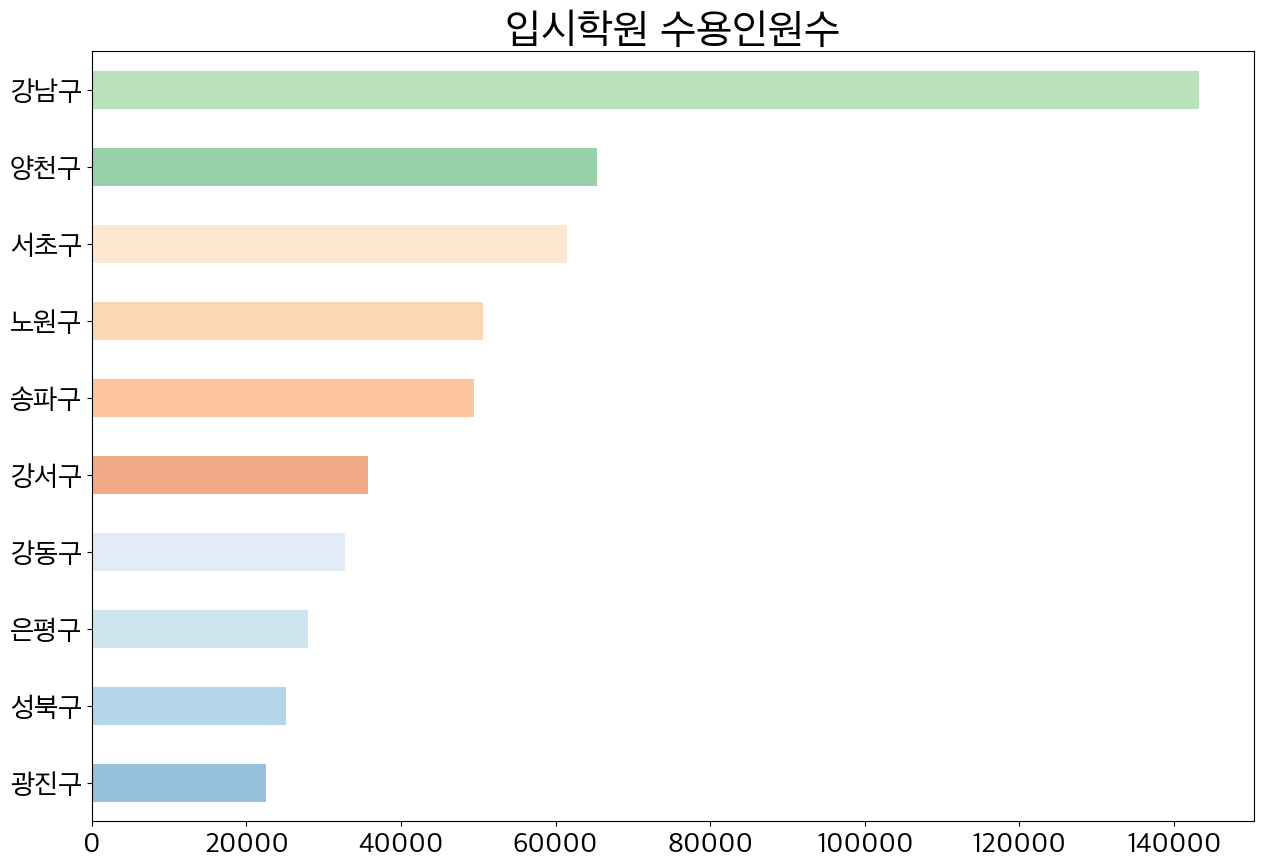

In [57]:
colors = sns.color_palette('tab20c')
plt.figure(figsize = (15,10))
# plt.plot(AA)
AA['입시학원_수용인원수'].plot(kind = 'barh', color = colors, alpha = 0.5)
plt.title('입시학원 수용인원수', size = 30)
plt.ylabel('')
plt.xticks(size = 20)
plt.yticks(size = 20)


<Axes: >

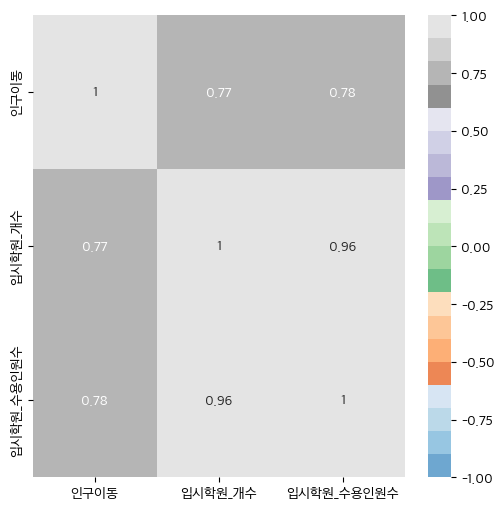

In [58]:
# < 인구이동과 입시학원의 시설수 & 수용인원수 상관도> 히트맵
import seaborn as sb
plt.rcParams["figure.figsize"] = (6,6)
sb.heatmap(B.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap='tab20c', # 색깔
          vmin=-1, vmax=1, alpha = 0.7)

#            vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1